# 01 Exploratory Data Analysis

As we read in oritinal docs data ('docs\Data-Codes' and 'docs\Domain-Descriptoon'), we know about the features right now:

**File Names and format:**
1. Date in MM-DD-YYYY format
2. Time in XX:YY format
3. Code
4. Value

**The Code field is deciphered as follows:**

- 33 = Regular insulin dose
- 34 = NPH insulin dose
- 35 = UltraLente insulin dose
- 48 = Unspecified blood glucose measurement
- 57 = Unspecified blood glucose measurement
- 58 = Pre-breakfast blood glucose measurement
- 59 = Post-breakfast blood glucose measurement
- 60 = Pre-lunch blood glucose measurement
- 61 = Post-lunch blood glucose measurement
- 62 = Pre-supper blood glucose measurement
- 63 = Post-supper blood glucose measurement
- 64 = Pre-snack blood glucose measurement
- 65 = Hypoglycemic symptoms
- 66 = Typical meal ingestion
- 67 = More-than-usual meal ingestion
- 68 = Less-than-usual meal ingestion
- 69 = Typical exercise activity
- 70 = More-than-usual exercise activity
- 71 = Less-than-usual exercise activity
- 72 = Unspecified special event


---
In this notebook, we will able to load, inspect, clean, and perform a thorough exploratory data analysis on  Diabetes dataset. We will investigate the data's structure, identify potential issues, analyze variable distributions, and uncover relationships between features and the target variable

## Setup and Imports

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# some options for better visualization
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)

## Data Loading and Assembly

In [162]:
data_path = '../data/01-raw/diabetes/'

# list of all data files in the directory
all_files = []
for file in os.listdir(data_path): # to garanteed but actually it is not necessary
    if file.startswith('data-'):
        all_files.append(os.path.join(data_path, file))
all_files.sort()

In [163]:
all_files[:3]

['../data/01-raw/diabetes/data-01',
 '../data/01-raw/diabetes/data-02',
 '../data/01-raw/diabetes/data-03']

In [164]:
df_list = []
for file in all_files:
    df = pd.read_csv(file, sep='\t', header=None, engine='python')
    df_list.append(df)

df_raw = pd.concat(df_list, ignore_index=True)

In [165]:
df_raw.head()

,0,1,2,3
0,04-21-1991,9:09,58,100
1,04-21-1991,9:09,33,9
2,04-21-1991,9:09,34,13
3,04-21-1991,17:08,62,119
4,04-21-1991,17:08,33,7


In [166]:
column_names = ['Date', 'Time', 'Code', 'Value']
df_raw.columns = column_names

In [167]:
df_raw.head()

,Date,Time,Code,Value
0,04-21-1991,9:09,58,100
1,04-21-1991,9:09,33,9
2,04-21-1991,9:09,34,13
3,04-21-1991,17:08,62,119
4,04-21-1991,17:08,33,7


---
## Data understanding

In [168]:
# dataset shape
df_raw.shape

(29330, 4)

29330 samples

In [169]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29330 entries, 0 to 29329
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    29297 non-null  object
 1   Time    29330 non-null  object
 2   Code    29330 non-null  int64 
 3   Value   29297 non-null  object
dtypes: int64(1), object(3)
memory usage: 916.7+ KB


In [170]:
df_raw['Value'] = pd.to_numeric(df_raw['Value'], errors='coerce')

In [171]:
df_raw.describe()

,Code,Value
count,29330.000000,29278.000000
mean,46.428606,79.374906
std,13.453219,93.496915
min,0.000000,0.000000
25%,33.000000,6.000000
50%,48.000000,24.000000
75%,60.000000,142.000000
max,72.000000,501.000000


## Data Cleaning

Let's treat de nan and duplicates values

In [172]:
df_raw.dropna(how='all', inplace=True)

In [173]:
df = df_raw.copy() 
df.isnull().sum()

Date     33
Time      0
Code      0
Value    52
dtype: int64

In [174]:
df.dropna(inplace=True)

In [175]:
df.duplicated().sum() # omg so mutch duplicates

np.int64(1872)

In [176]:
df.drop_duplicates(inplace=True)

In [177]:
df.shape

(27384, 4)

now we have 29330 samples and no duplicates or missing values.

In [178]:
df.head()

,Date,Time,Code,Value
0,04-21-1991,9:09,58,100.0
1,04-21-1991,9:09,33,9.0
2,04-21-1991,9:09,34,13.0
3,04-21-1991,17:08,62,119.0
4,04-21-1991,17:08,33,7.0


In [179]:
df['Timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')

# Let's find out which rows failed to parse
failed_rows = df[df['Timestamp'].isnull()]
if not failed_rows.empty:
    print(f"Found {len(failed_rows)} row(s) that could not be parsed. They will be removed.")
    print(failed_rows)

df.dropna(subset=['Timestamp'], inplace=True)
df.set_index('Timestamp', inplace=True)
df.drop(['Date', 'Time'], axis=1, inplace=True)
df.sort_index(inplace=True)

Found 12 row(s) that could not be parsed. They will be removed.
             Date    Time  Code  Value Timestamp
6505   06-31-1991   07:50    58  149.0       NaT
6506   06-31-1991   07:50    33    4.0       NaT
6507   06-31-1991   07:50    34   24.0       NaT
6508   06-31-1991   13:30    60  162.0       NaT
6509   06-31-1991   13:30    33    5.0       NaT
6510   06-31-1991   19:45    62  213.0       NaT
6511   06-31-1991   19:45    33   11.0       NaT
28070  04-09-1991   56:35    58  237.0       NaT
28071  04-09-1991   56:35    33   16.0       NaT
28072  04-09-1991   56:35    34   40.0       NaT
28171  04-21-1991  188:00    62  128.0       NaT
28172  04-21-1991  188:00    33   14.0       NaT


In [180]:
df

,Code,Value
Timestamp,,
1988-03-27 08:00:00,58,134.0
1988-03-27 08:00:00,34,20.0
1988-03-27 12:00:00,60,158.0
1988-03-27 18:00:00,62,258.0
1988-03-28 08:00:00,34,20.0
...,...,...
1991-09-23 12:15:00,33,5.0
1991-09-23 17:15:00,62,264.0
1991-09-23 17:15:00,33,13.0


Now we pivot the Code column so that each code becomes its own feature column.

In [181]:
df_pivoted = df.pivot_table(index='Timestamp', columns='Code', values='Value')

In [182]:
df_pivoted.head()

Code,4,33,34,35,36,48,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72
Timestamp,,,,,,,,,,,,,,,,,,,,,,,
1988-03-27 08:00:00,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,134.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988-03-27 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988-03-27 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988-03-28 08:00:00,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988-03-28 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Basecally we have the "features" in just one (code) and by this way is so more simple to time series forecast

In [183]:
code_map = { 33: 'Insulin_Regular', 
            34: 'Insulin_NPH', 
            35: 'Insulin_UltraLente',
            48: 'Glucose_Unspecified', 
            57: 'Glucose_Unspecified_2', 
            58: 'Glucose_PreBreakfast',
            59: 'Glucose_PostBreakfast', 
            60: 'Glucose_PreLunch', 
            61: 'Glucose_PostLunch',
            62: 'Glucose_PreSupper', 
            63: 'Glucose_PostSupper', 
            64: 'Glucose_PreSnack',
            65: 'Symptom_Hypoglycemic', 
            66: 'Meal_Typical', 
            67: 'Meal_MoreThanUsual',
            68: 'Meal_LessThanUsual', 
            69: 'Exercise_Typical', 
            70: 'Exercise_MoreThanUsual',
            71: 'Exercise_LessThanUsual', 
            72: 'Event_Unspecified'
            }

In [184]:
df_pivoted.rename(columns=code_map, inplace=True)

In [185]:
unique_codes_in_data = df['Code'].unique()
mapped_codes = code_map.keys()

unmapped_codes = []
for code in unique_codes_in_data:
    if code not in mapped_codes:
        unmapped_codes.append(code)
print(unmapped_codes)

[np.int64(56), np.int64(36), np.int64(4)]


In [186]:
all_code_counts = df['Code'].value_counts()
unmapped_counts = all_code_counts[unmapped_codes]
unmapped_counts # very insignificant, so we can ignore them

Code
56    97
36     1
4      1
Name: count, dtype: int64

In [187]:
df_pivoted.drop(columns=unmapped_codes, inplace=True, errors='ignore')

## Exploratory Data Analysis 

In [188]:
df_pivoted.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14740 entries, 1988-03-27 08:00:00 to 1991-09-23 21:10:00
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Insulin_Regular         7634 non-null   float64
 1   Insulin_NPH             3279 non-null   float64
 2   Insulin_UltraLente      990 non-null    float64
 3   Glucose_Unspecified     1453 non-null   float64
 4   Glucose_Unspecified_2   904 non-null    float64
 5   Glucose_PreBreakfast    2888 non-null   float64
 6   Glucose_PostBreakfast   16 non-null     float64
 7   Glucose_PreLunch        2196 non-null   float64
 8   Glucose_PostLunch       60 non-null     float64
 9   Glucose_PreSupper       2501 non-null   float64
 10  Glucose_PostSupper      195 non-null    float64
 11  Glucose_PreSnack        750 non-null    float64
 12  Symptom_Hypoglycemic    292 non-null    float64
 13  Meal_Typical            152 non-null    float64
 14  Mea

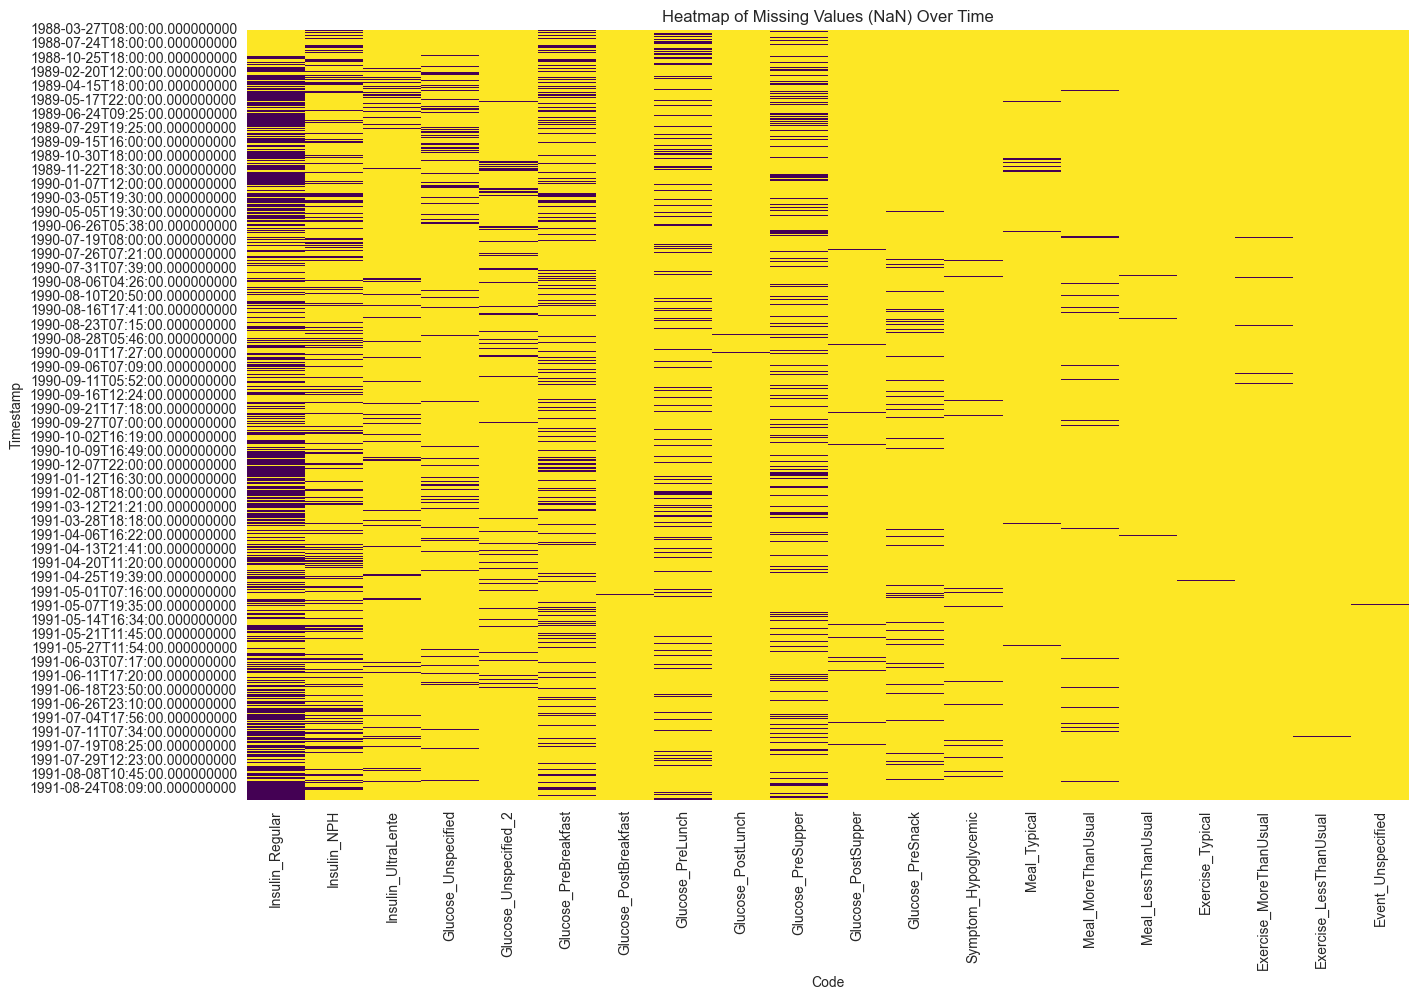

In [189]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_pivoted.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values (NaN) Over Time')
plt.ylabel('Timestamp')
plt.show()

Let's visualize the most important measurements over time: glucose levels and insulin doses. We use 'o' (dots) for the style because the data is sparse, not continuous.

How are the values for key measurements distributed?